## Data Cleaning

In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [169]:
df = pd.read_csv('superstore_data.csv')
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Handling Missing Values

In [171]:
# Check for missing values
df.isna().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [172]:
# Drop entries with missing value
df = df.dropna(subset = ['Income'])
df.isna().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

### Correcting Data Types

In [173]:
# Change data types
df['Id'] = df['Id'].astype('str')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Income'] = df['Income'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   2216 non-null   object        
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   int64         
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

## Feature Engineering

I decided to create two new features for the data: Age and TotalAmount. The birth year was given in the data, but I felt age was a more appropriate feature that would better for the visualizations of the analysis. Additionally the data gave the amount spent on various types of products, which I combined into a total amount spent.

In [174]:
# Create an age feature
yr = 2024
df['Age'] = yr-df['Year_Birth']

In [175]:
# Create a total purchase amount feature
df['TotalAmount'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   2216 non-null   object        
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   int64         
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [177]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,TotalAmount
0,1826,1970,Graduation,Divorced,84835,0,0,2014-06-16,0,189,...,218,1,4,4,6,1,1,0,54,1190
1,1,1961,Graduation,Single,57091,0,0,2014-06-15,0,464,...,37,1,7,3,7,5,1,0,63,577
2,10476,1958,Graduation,Married,67267,0,1,2014-05-13,0,134,...,30,1,3,2,5,2,0,0,66,251
3,1386,1967,Graduation,Together,32474,1,1,2014-11-05,0,10,...,0,1,1,0,2,7,0,0,57,11
4,5371,1989,Graduation,Single,21474,1,0,2014-08-04,0,6,...,34,2,3,1,2,7,1,0,35,91


## Exploratory Data Analysis

In [178]:
df.describe(include='int').T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.0,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.0,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.0,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.0,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.0,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.0,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.0,12.0,50.00,259.0
MntSweetProducts,2216.0,27.028881,41.072046,0.0,1.0,8.0,33.00,262.0


<Axes: >

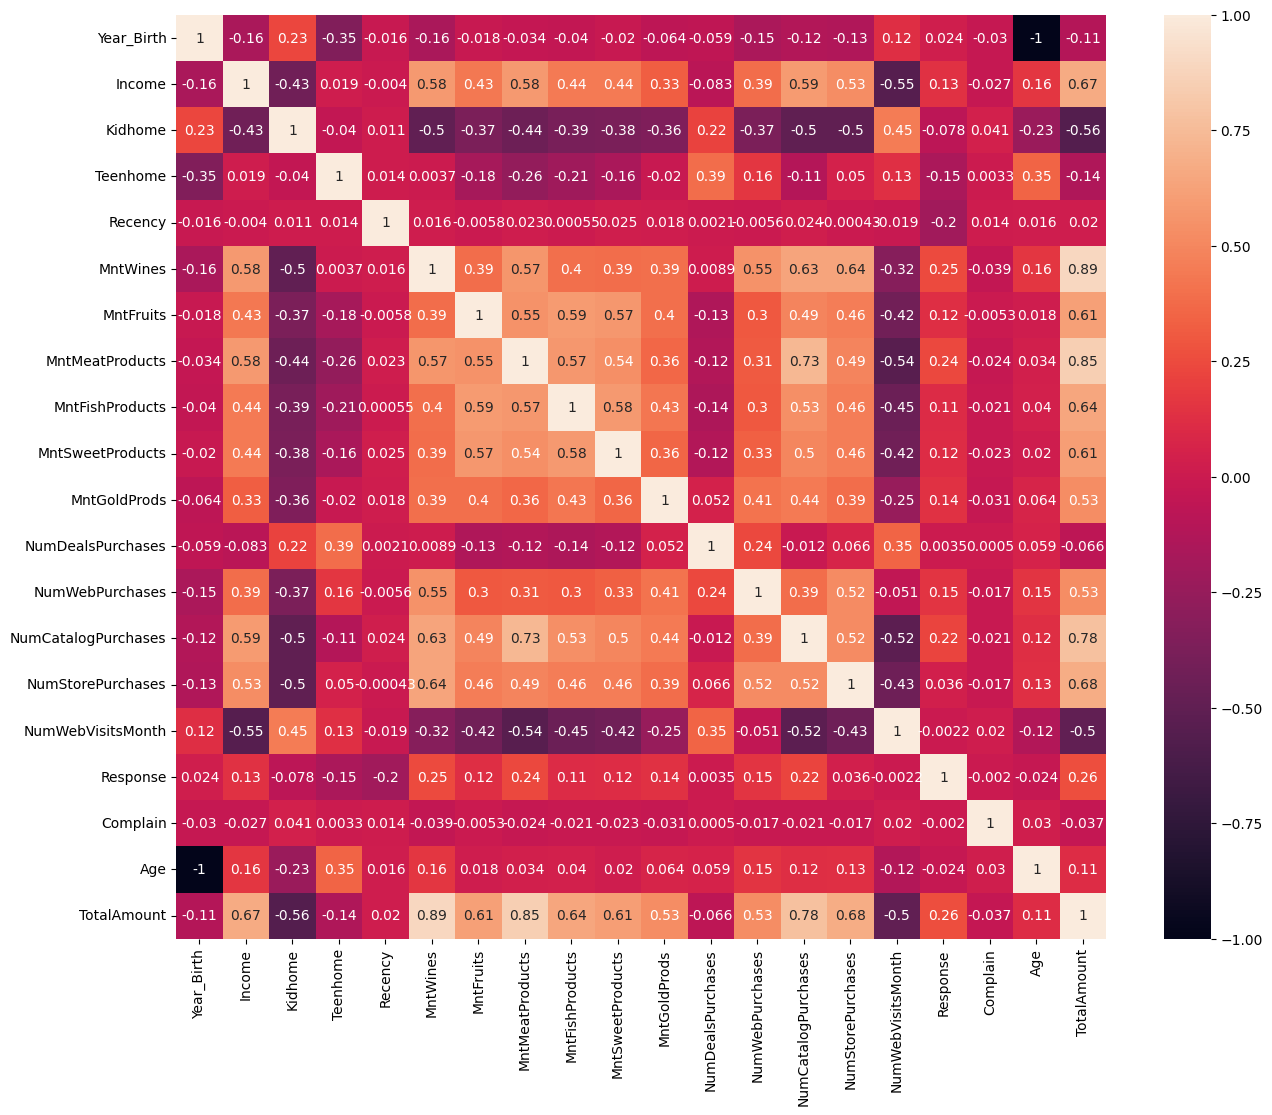

In [179]:
# View correlation of features
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [180]:
df1 = df[['Age','Income','TotalAmount','Recency','Education','Marital_Status','Kidhome','Teenhome','Response']]
df1.sample(10)

,Age,Income,TotalAmount,Recency,Education,Marital_Status,Kidhome,Teenhome,Response
1070,72,44213,152,48,Graduation,Single,1,1,0
448,64,38201,268,19,PhD,Together,0,1,0
60,42,6560,373,2,Master,Single,0,0,0
1390,73,71107,1327,61,Graduation,Married,0,1,0
1162,58,57183,610,51,Master,Married,1,1,0
763,61,33562,51,33,Master,Married,1,2,0
1850,48,37697,84,82,Graduation,Single,1,0,0
1939,42,22448,55,86,Graduation,Married,1,0,0
196,62,71670,1766,8,PhD,Widow,0,0,1
1304,60,41713,174,57,2n Cycle,Divorced,1,1,0


In [181]:
# Checking for skewed data
df1.skew(numeric_only=True)

Age            0.353661
Income         6.763487
TotalAmount    0.858055
Recency        0.001648
Kidhome        0.635610
Teenhome       0.407553
Response       1.958748
dtype: float64

### Removing Outliers

In [182]:
# Removing Outliers
columns = ['Age','Income','TotalAmount']
for i in columns:
    q_low = df1[i].quantile(0.01)
    q_hi  = df1[i].quantile(0.99)

    df1 = df1[(df1[i] < q_hi) & (df1[i] > q_low)]
df1.skew(numeric_only=True)

Age            0.095569
Income         0.023420
TotalAmount    0.805054
Recency       -0.002164
Kidhome        0.578465
Teenhome       0.329667
Response       2.025117
dtype: float64

In [183]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Education'] = le.fit_transform(df1['Education'])
df1['Marital_Status'] = le.fit_transform(df1['Marital_Status'])
df1.head()

,Age,Income,TotalAmount,Recency,Education,Marital_Status,Kidhome,Teenhome,Response
0,54,84835,1190,0,2,2,0,0,1
1,63,57091,577,0,2,4,0,0,1
2,66,67267,251,0,2,3,0,1,0
4,35,21474,91,0,2,4,1,0,1
5,66,71691,1192,0,4,4,0,0,1


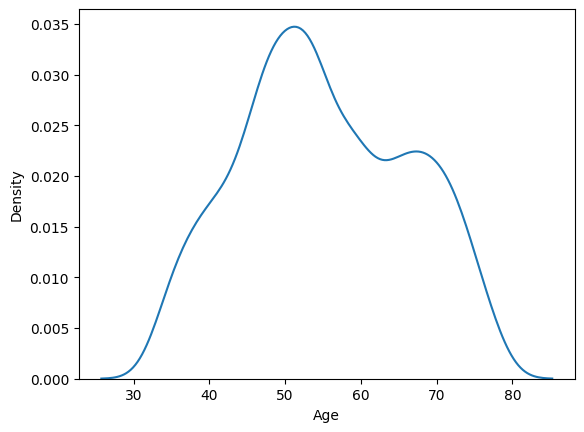

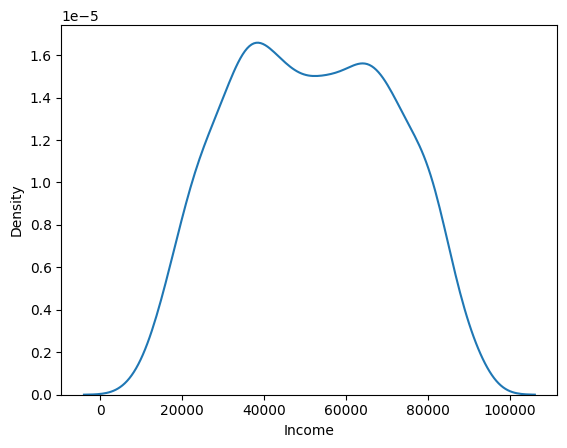

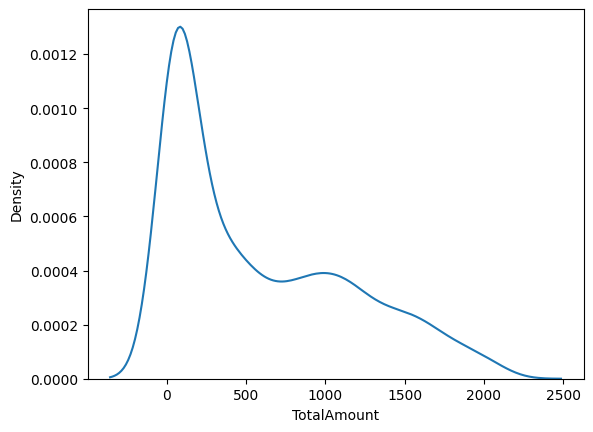

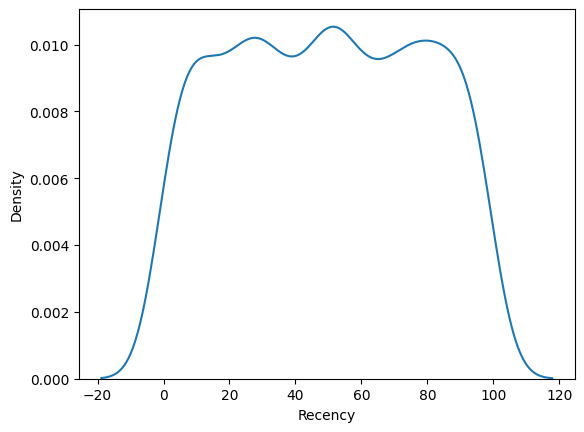

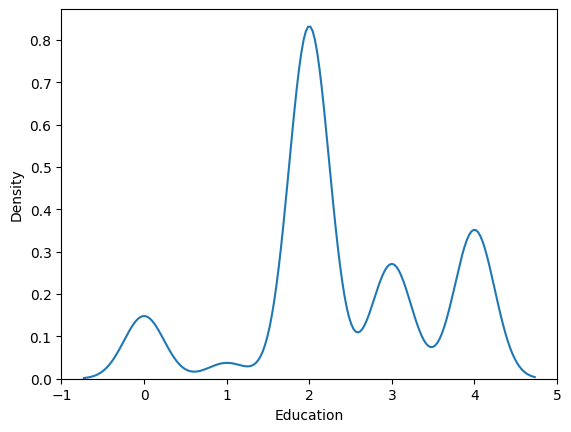

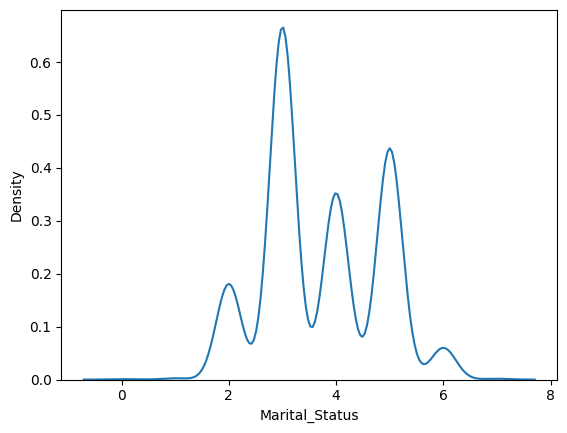

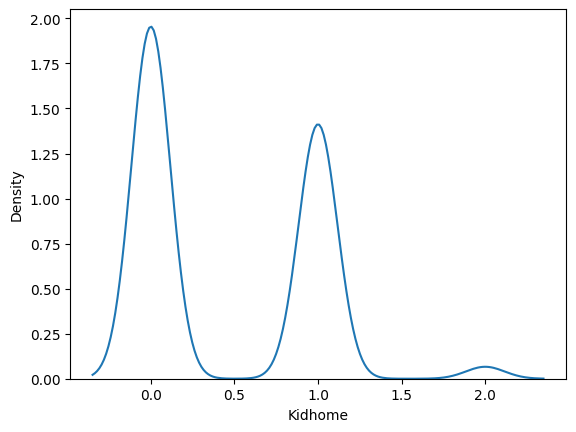

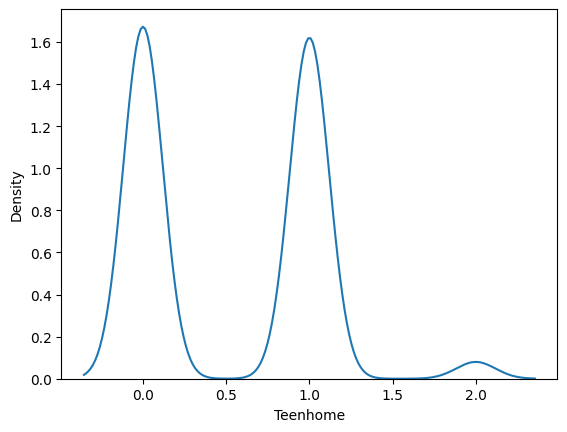

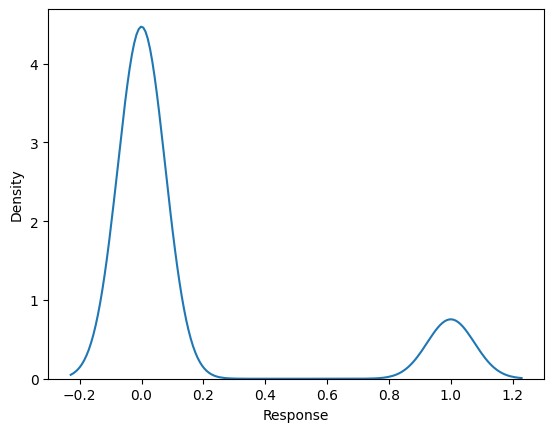

In [184]:
# Look at the density plot for each feature and get a better view of the distribution
all_columns = df1.columns.to_list()
for i in all_columns:
    plt.figure()
    sns.kdeplot(df1[i])

### Bivariate Analysis

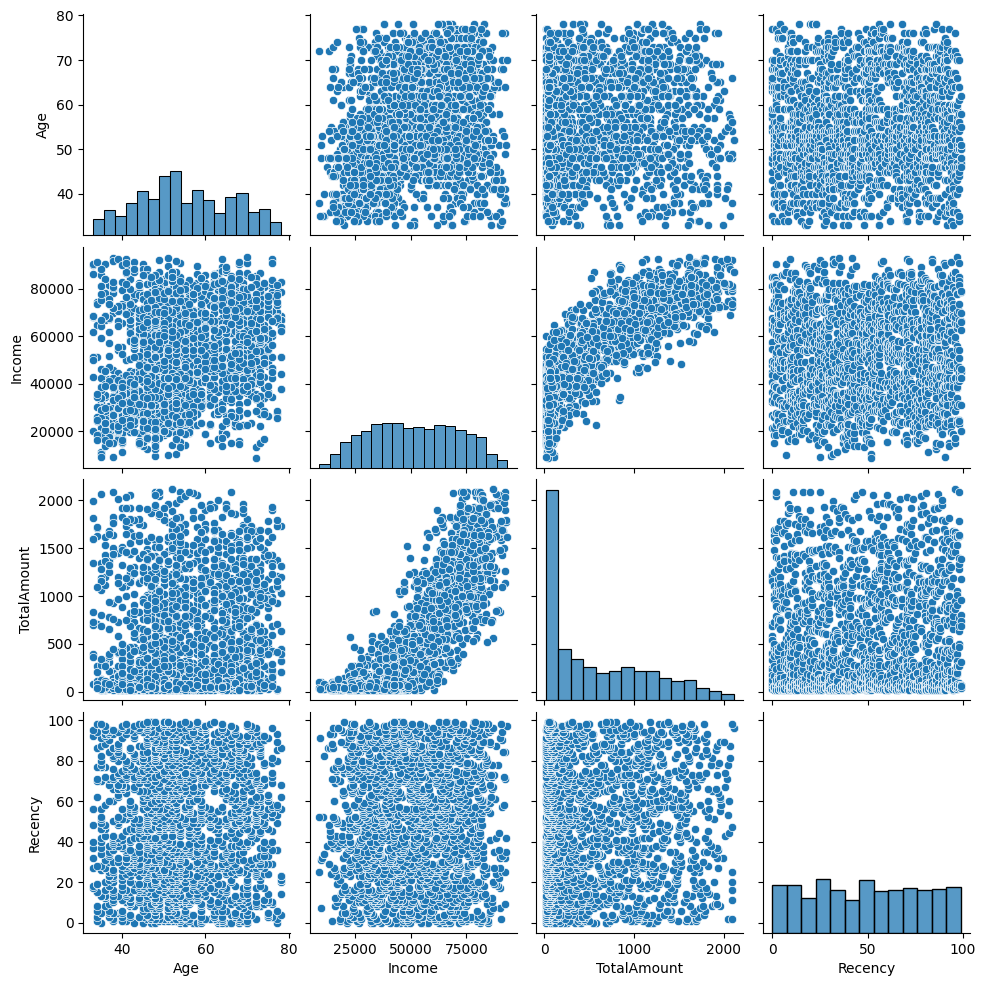

In [185]:
x = df1[['Age','Income','TotalAmount','Recency']]
sns.pairplot(data=x)

## K-Means on Age and Income

<Axes: xlabel='Age', ylabel='Income'>

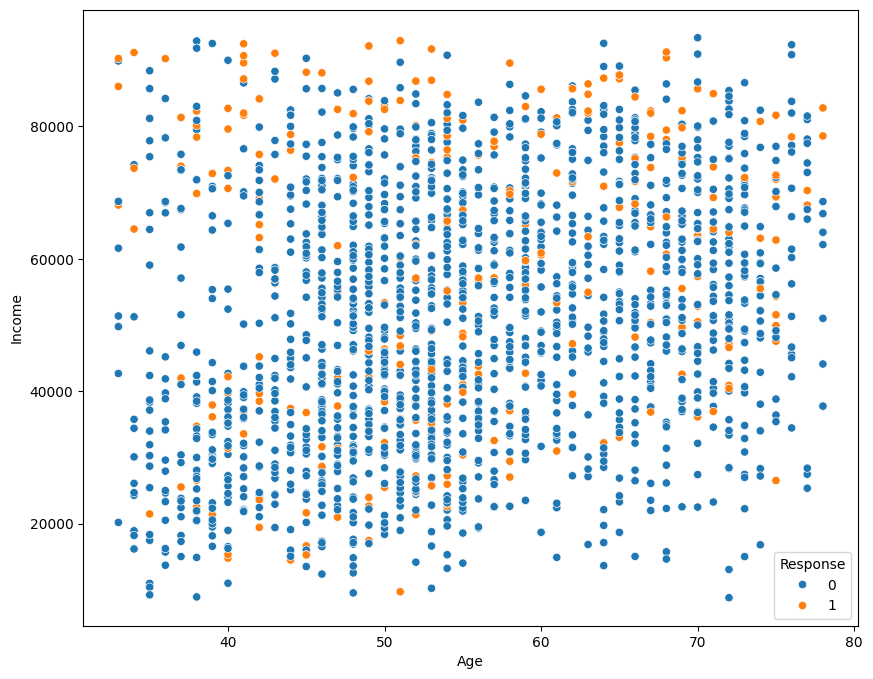

In [186]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df1,x='Age',y='Income',hue='Response',palette='tab10')

In [187]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df1[['Age', 'Income']])
df1['Age/Income Cluster'] = kmeans.labels_
df1.head()

,Age,Income,TotalAmount,Recency,Education,Marital_Status,Kidhome,Teenhome,Response,Age/Income Cluster
0,54,84835,1190,0,2,2,0,0,1,0
1,63,57091,577,0,2,4,0,0,1,2
2,66,67267,251,0,2,3,0,1,0,0
4,35,21474,91,0,2,4,1,0,1,1
5,66,71691,1192,0,4,4,0,0,1,0


### Finding the optimal number of clusters with the Elbow Method
The Elbow Method is a technique used to determine the optimal number of clusters (K) in K-Means clustering. It calculate the sum of squared distances (inertia) between each data point and its assigned cluster centroid.

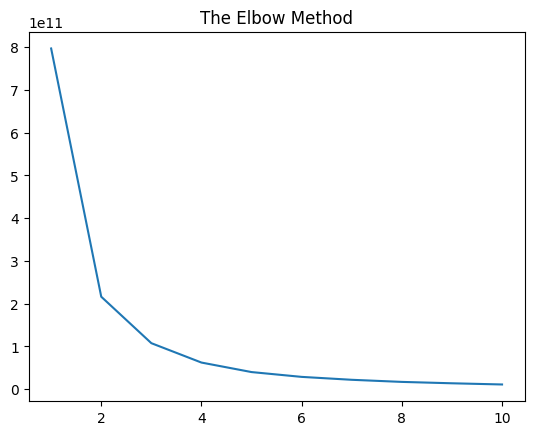

In [188]:
inertia_scores = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i)
    kmean.fit(df1[['Age', 'Income']])
    inertia_scores.append(kmean.inertia_)
plt.title('The Elbow Method')
plt.plot(range(1,11),inertia_scores);

In [189]:
centers = pd.DataFrame(kmeans.cluster_centers_)
centers.columns = ['x', 'y']

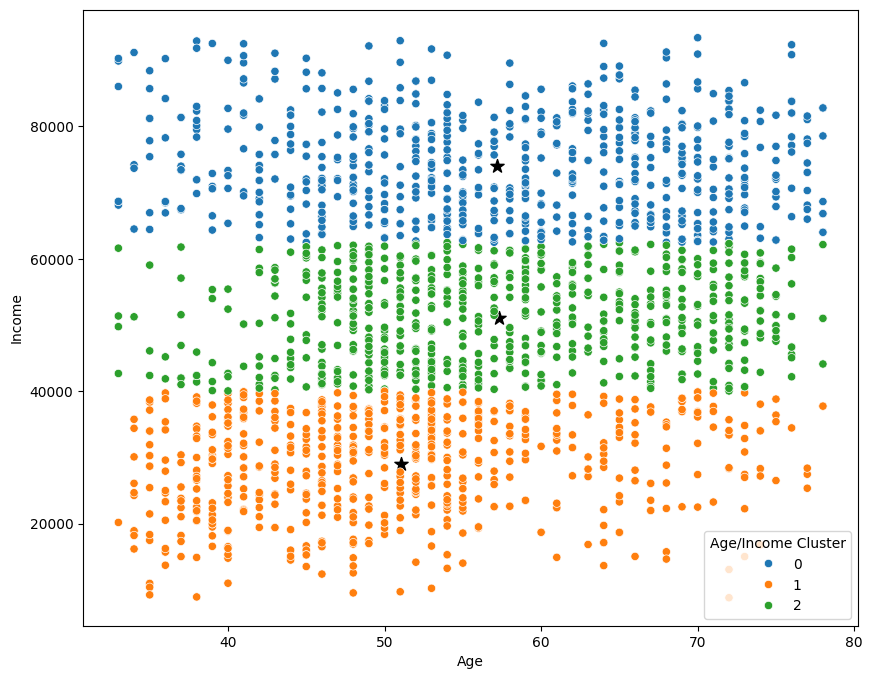

In [190]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')
sns.scatterplot(data=df1, x='Age', y='Income', hue='Age/Income Cluster', palette='tab10');

In [191]:
pd.crosstab(df1['Age/Income Cluster'], df1['Response'],normalize='index')

Response,0,1
Age/Income Cluster,,
0,0.789244,0.210756
1,0.877400,0.122600
2,0.899433,0.100567


## K-Means on Recency and Total Amount

<Axes: xlabel='Recency', ylabel='TotalAmount'>

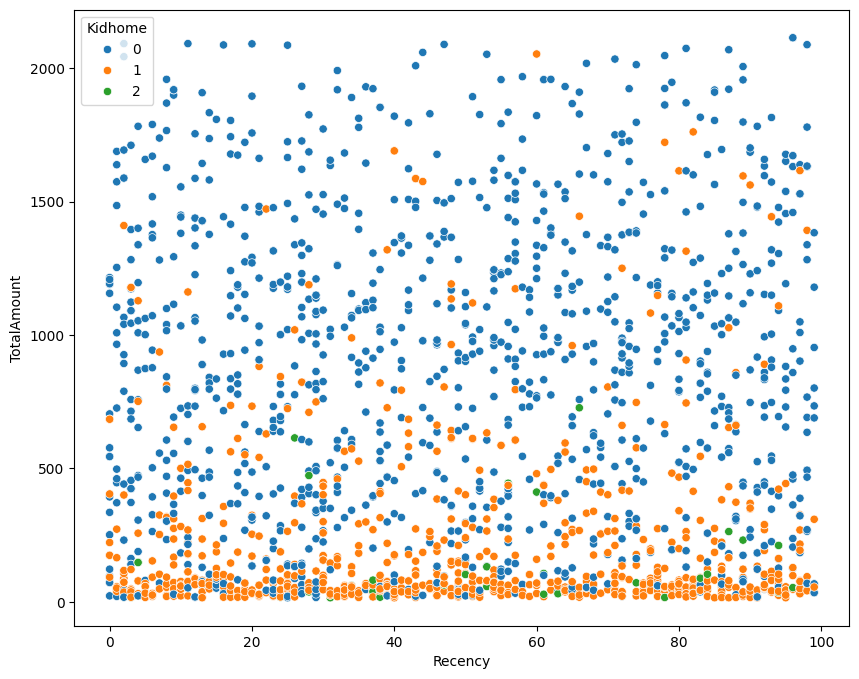

In [192]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df1,x='Recency',y='TotalAmount',hue='Kidhome',palette='tab10')

In [193]:
kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(df1[['Recency', 'TotalAmount']])
df1['Recency/Total Cluster'] = kmeans2.labels_
df1.head()

,Age,Income,TotalAmount,Recency,Education,Marital_Status,Kidhome,Teenhome,Response,Age/Income Cluster,Recency/Total Cluster
0,54,84835,1190,0,2,2,0,0,1,0,2
1,63,57091,577,0,2,4,0,0,1,2,2
2,66,67267,251,0,2,3,0,1,0,0,0
4,35,21474,91,0,2,4,1,0,1,1,0
5,66,71691,1192,0,4,4,0,0,1,0,2


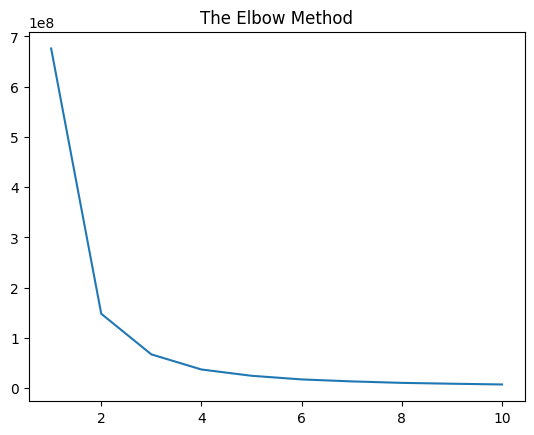

In [194]:
inertia_scores = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i)
    kmean.fit(df1[['Recency', 'TotalAmount']])
    inertia_scores.append(kmean.inertia_)
plt.title('The Elbow Method')
plt.plot(range(1,11),inertia_scores);

In [195]:
centers = pd.DataFrame(kmeans2.cluster_centers_)
centers.columns = ['x', 'y']

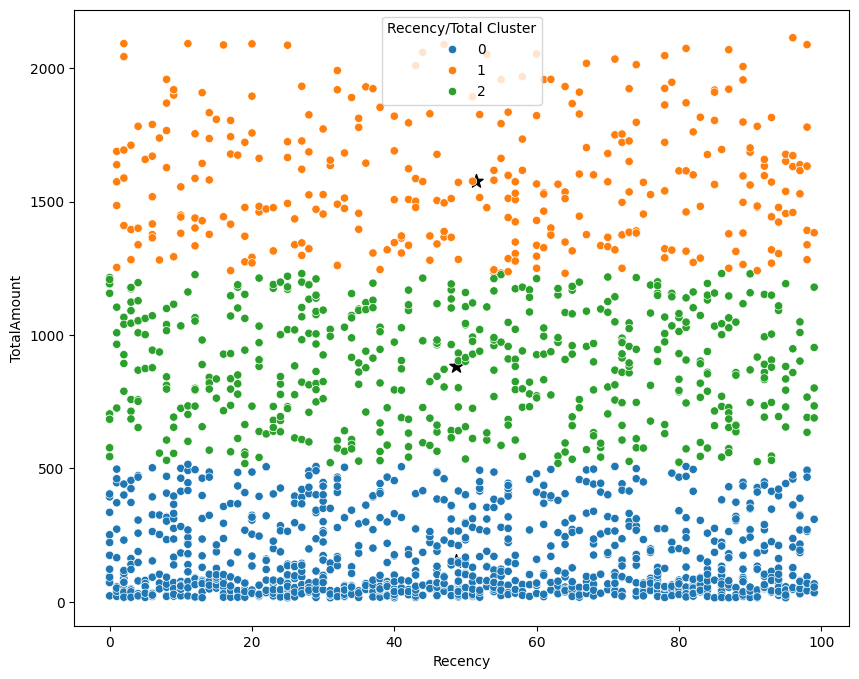

In [196]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')
sns.scatterplot(data=df1, x='Recency', y='TotalAmount', hue='Recency/Total Cluster', palette='tab10');

In [197]:
pd.crosstab(df1['Recency/Total Cluster'], df1['Kidhome'],normalize='index')

Kidhome,0,1,2
Recency/Total Cluster,,,
0,0.326235,0.641397,0.032368
1,0.938776,0.061224,0.000000
2,0.855596,0.140794,0.003610


## DBSCAN on Age and Income

In [198]:
df2 = df[['Age','Income','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Response']]
df2.head()

,Age,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response
0,54,84835,1,4,4,6,1,1
1,63,57091,1,7,3,7,5,1
2,66,67267,1,3,2,5,2,0
3,57,32474,1,1,0,2,7,0
4,35,21474,2,3,1,2,7,1


In [199]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import RobustScaler

# Scale the data
x = df1[['Age','Income','Response']]
scr = RobustScaler()
scr.fit(x)
x = pd.DataFrame(scr.transform(x),columns=x.columns)



clustering = DBSCAN(eps=0.09,min_samples=10)
clustering.fit(x)
x['Age and Income Cluster'] = clustering.labels_
x.head(10)

,Age,Income,Response,Age and Income Cluster
0,0.000000,1.066264,1.0,-1
1,0.529412,0.188108,1.0,-1
2,0.705882,0.510200,0.0,0
3,-1.117647,-0.939244,1.0,-1
4,0.705882,0.650229,1.0,-1
5,0.941176,0.392992,1.0,-1
6,0.176471,-0.196781,0.0,0
7,0.941176,0.448700,0.0,0
8,0.941176,0.448700,0.0,0
9,1.352941,0.946271,0.0,-1


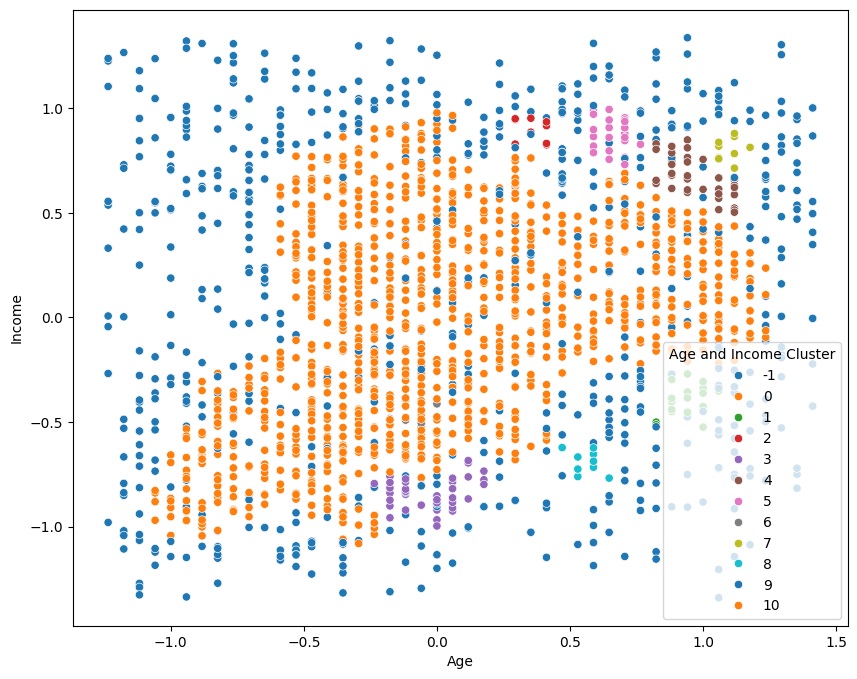

In [202]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=x, x='Age', y='Income', hue='Age and Income Cluster', palette='tab10');

In [203]:
pd.crosstab(x['Age and Income Cluster'], x['Response'])

Response,0.0,1.0
Age and Income Cluster,,
-1,424,288
0,1172,0
1,24,0
2,10,0
3,41,0
4,35,0
5,24,0
6,0,11
7,11,0
